# Monthly ternd /Best and worst months + Charts

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv("sales_backup_3.csv")
print(df.to_string())

   OrderID CustomerName        City     Product     Category  Quantity  Price  Discount  TotalAmount  DiscountAmount  NetAmount        Date  Month
0     1001        Anish   Kathmandu      Laptop  Electronics         1  80000      10.0        80000          8000.0    72000.0  2024-04-04      4
1     1002         Riya     Pokhara       Phone  Electronics         2  30000       5.0        60000          3000.0    57000.0  2024-01-02      1
2     1003        Suman   Kathmandu  Headphones  Electronics         1   2000       0.0         2000             0.0     2000.0  2024-07-30      7
3     1004        Anish   Kathmandu      Laptop  Electronics         1  80000      10.0        80000          8000.0    72000.0  2024-06-28      6
4     1005        Kiran  Biratnagar       Chair    Furniture         3   5000       0.0        15000             0.0    15000.0  2024-10-20     10
5     1006          NaN     Pokhara       Table    Furniture         1  15000       5.0        15000           750.0  

In [4]:
df.columns

Index(['OrderID', 'CustomerName', 'City', 'Product', 'Category', 'Quantity',
       'Price', 'Discount', 'TotalAmount', 'DiscountAmount', 'NetAmount',
       'Date', 'Month'],
      dtype='object')

In [7]:
monthly_sales = df.groupby("Month")["TotalAmount"].sum()
monthly_sales

Month
1      60000
4     175500
6      80000
7       2000
8      30000
10     15000
12      2500
Name: TotalAmount, dtype: int64

# Checking The Best Month with Highest Sales

In [ ]:
#Finding the Best selling month a
monthly_sales.sort_values(ascending=False).head(1)


Month
4    175500
Name: TotalAmount, dtype: int64

Month 4 have the highest selling of product than other months . Best month have strong demand and good marketing 

In [ ]:
#checking the least 
monthly_sales.sort_values().head(1)

Month
7    2000
Name: TotalAmount, dtype: int64

Month 4 have the lowest and worst sales which slows the business 

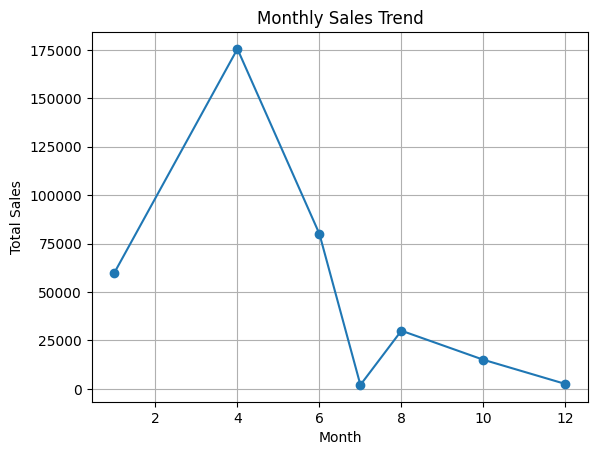

In [10]:
monthly_sales.plot(kind="line", marker="o")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

The growing line up indicates the business growing and line going downwards indicates the sales falling and sudden spike with big orders or promotions

In [ ]:
# Month - to - Month Change 
monthly_growth = monthly_sales.diff() #diff() checks the "CURRENT MONTH AND PREVIOUS MONTH "
monthly_growth

Month
1          NaN
4     115500.0
6     -95500.0
7     -78000.0
8      28000.0
10    -15000.0
12    -12500.0
Name: TotalAmount, dtype: float64

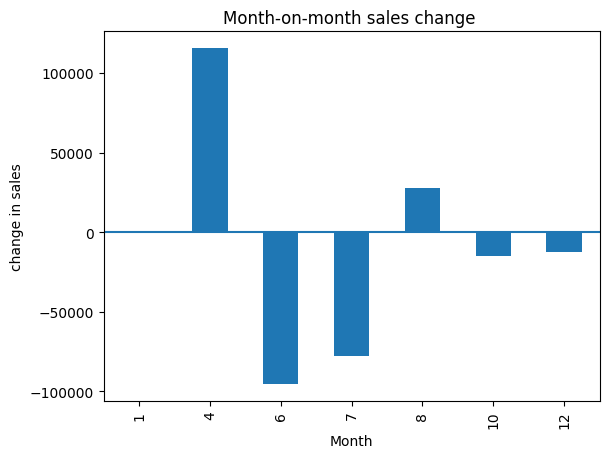

In [14]:
monthly_growth.plot(kind="bar" )
plt.title("Month-on-month sales change ")
plt.xlabel("Month")
plt.ylabel("change in sales")
plt.axhline(0)   #Add a horizontal line spanning the whole or fraction of the Axes
plt.show()

We can see that the bar above the horizontal line states the growth of bussiness and bar below states the decrease in sales than the previous month 

# Cumulative Sales 

In [15]:
#This shows the total progress over time 

cumulative_sales = monthly_sales.cumsum()
cumulative_sales

Month
1      60000
4     235500
6     315500
7     317500
8     347500
10    362500
12    365000
Name: TotalAmount, dtype: int64

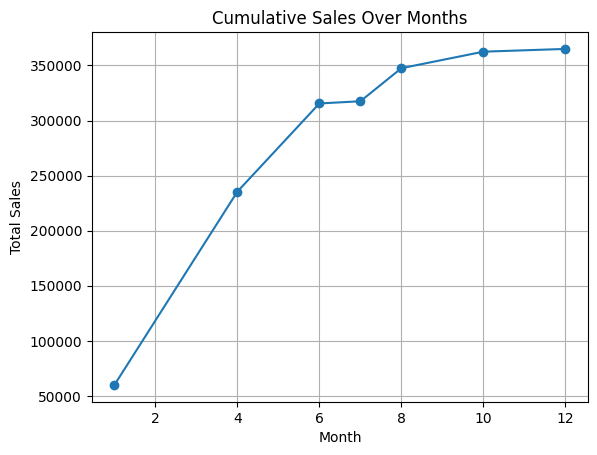

In [16]:
cumulative_sales.plot(kind="line", marker="o")
plt.title("Cumulative Sales Over Months")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

# Category - Wise Monthly Trend

In [ ]:
#Which category performed in which month 
category_month = df.groupby(["Month","Category"])["TotalAmount"].sum()
category_month

Month  Category   
1      Electronics     60000
4      Electronics    160000
       Furniture       15000
       Stationery        500
6      Electronics     80000
7      Electronics      2000
8      Electronics     30000
10     Furniture       15000
12     Stationery       2500
Name: TotalAmount, dtype: int64

In [ ]:
category_month = category_month.unstack() #Stacking the Category 
category_month

Category,Electronics,Furniture,Stationery
Month,,,
1,60000.0,NaN,NaN
4,160000.0,15000.0,500.0
6,80000.0,NaN,NaN
7,2000.0,NaN,NaN
8,30000.0,NaN,NaN
10,NaN,15000.0,NaN
12,NaN,NaN,2500.0


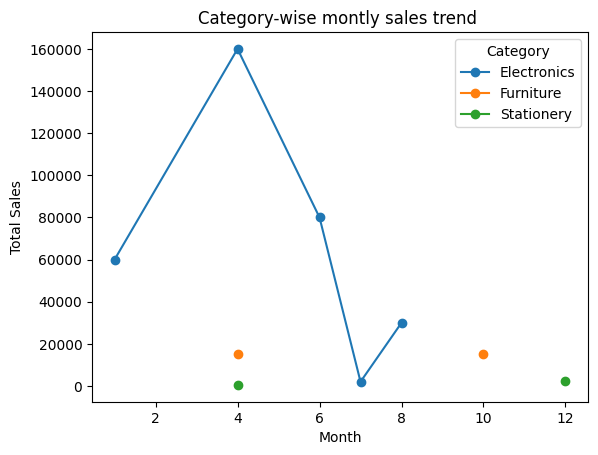

In [19]:
category_month.plot(kind="line",marker="o")
plt.title("Category-wise montly sales trend ")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()